In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")
df   

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df.info()
df.dtypes
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df['fueltype'].value_counts()
     


gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['fueltype'])
df['fueltype'] = label_encoder.transform(df['fueltype'])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.pop('CarName')
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,1,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,1,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,0,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
from sklearn import preprocessing

df2 = pd.get_dummies(df, columns = ['aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   fueltype               205 non-null    int64  
 3   wheelbase              205 non-null    float64
 4   carlength              205 non-null    float64
 5   carwidth               205 non-null    float64
 6   carheight              205 non-null    float64
 7   curbweight             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

In [12]:


df = df2.dropna()
     


df.isna().sum()

car_ID                   0
symboling                0
fueltype                 0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
fuelsystem_1bbl          0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mfi           0
fuelsystem_mpfi          0
f

car_ID                   0
symboling                0
fueltype                 0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
fuelsystem_1bbl          0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mfi           0
fuelsystem_mpfi          0
f

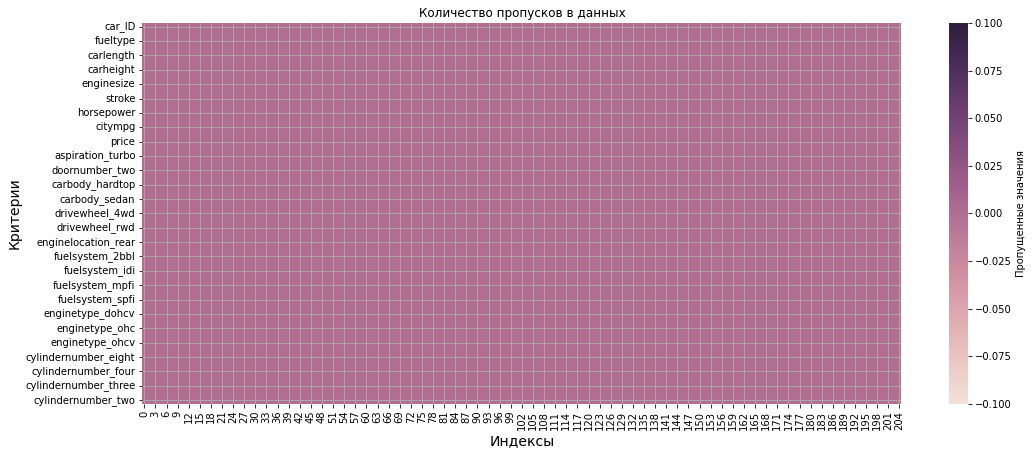

In [13]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

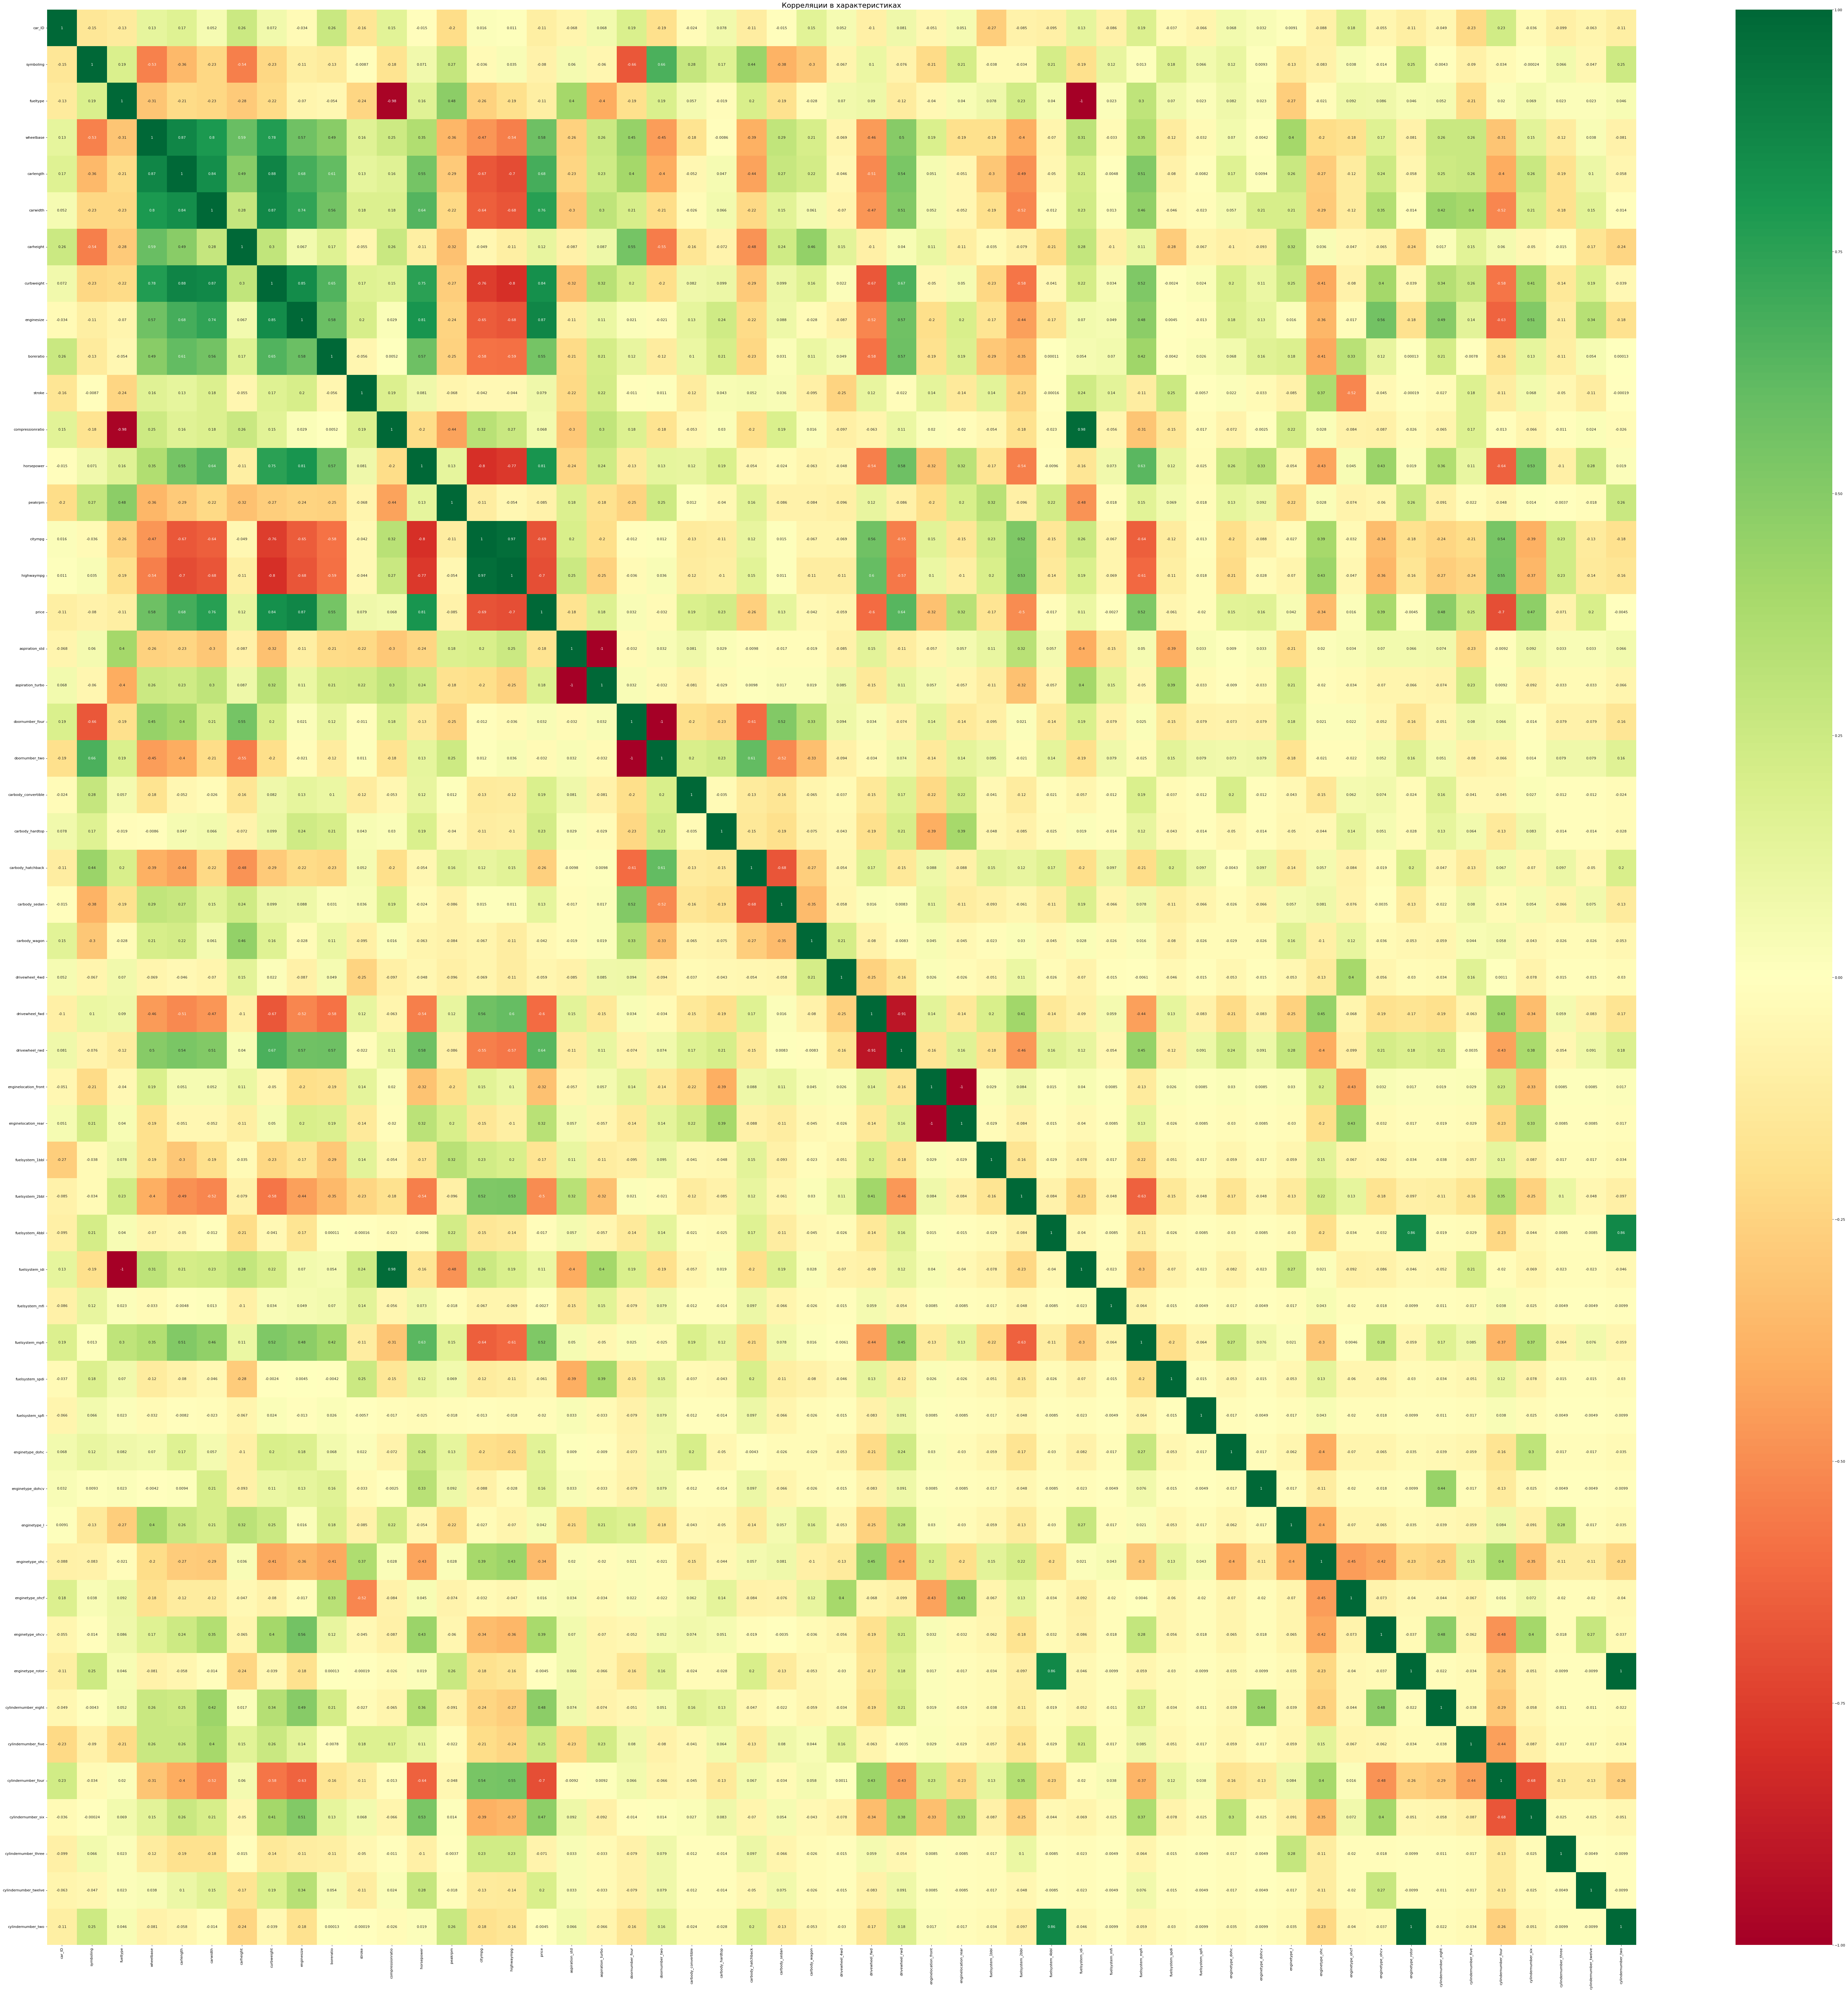

In [21]:

plt.figure(figsize=(100,100), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()


In [14]:
y = df['price']
x = df.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

-49115.21403973053 [-1.47692818e+01  1.62731496e+02 -2.87717406e+03 -3.43290093e+01
 -3.21121482e+01  6.36517454e+02  2.48358160e+02  5.04289474e+00
  6.88435622e+01 -2.53547415e+02 -2.90737101e+03 -2.69438912e+02
  2.10896131e+01  1.98948962e+00 -1.84172379e+02  2.54310357e+02
 -7.78303107e+02  7.78303107e+02  6.54495113e+01 -6.54495113e+01
  8.52145321e+02  2.95842600e+03 -1.26548003e+03 -3.56987168e+02
 -2.18810412e+03 -2.00344112e+02 -6.02561143e+02  8.02905256e+02
 -3.68023120e+03  3.68023120e+03  3.05450143e+02  4.99599332e+02
 -1.37875256e+03  2.87717406e+03 -2.46857664e+03  1.17075308e+03
 -1.00564742e+03  0.00000000e+00  1.10791530e+02 -1.46860878e+02
 -8.26575028e+02  2.85975127e+03  2.30761382e+03 -6.02298410e+03
  1.71826339e+03 -1.46860878e+02 -3.39801313e+03 -2.84639271e+03
  1.90799696e+03  0.00000000e+00  2.76500638e+03  1.71826339e+03]


In [17]:


ans = str(w0)
for i in range(8):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)
    

-49115.21403973053 + -14.769281826717542 * x1 + 162.7314958760093 * x2 + -2877.1740637564335 * x3 + -34.32900932986915 * x4 + -32.11214817619155 * x5 + 636.5174541932035 * x6 + 248.35816001015854 * x7 + 5.042894737162712 * x8


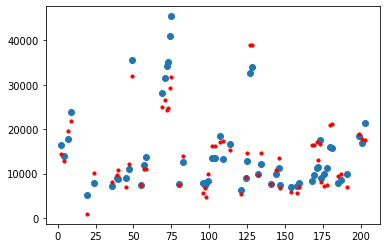

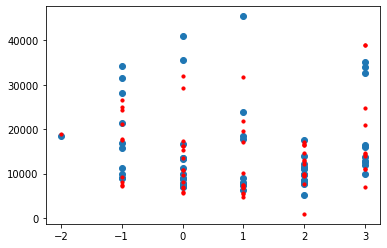

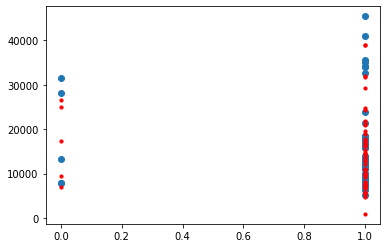

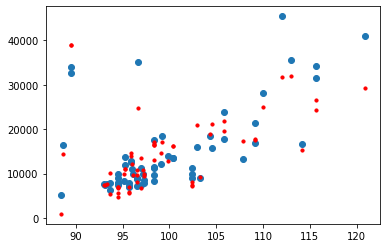

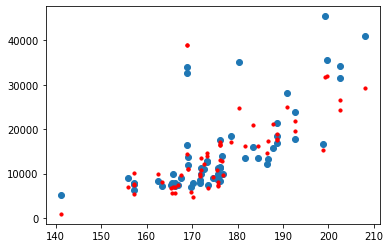

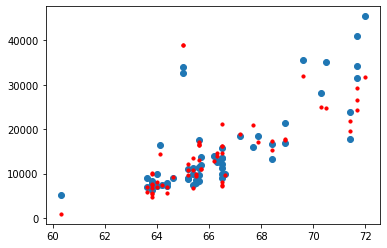

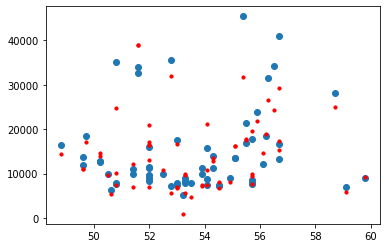

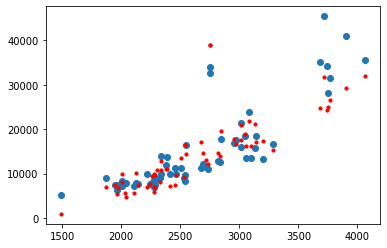

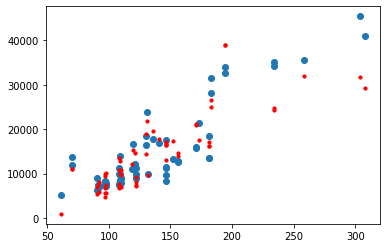

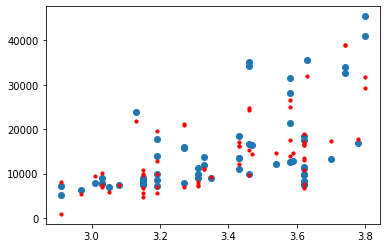

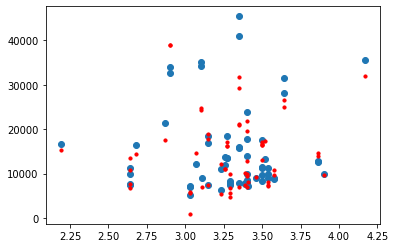

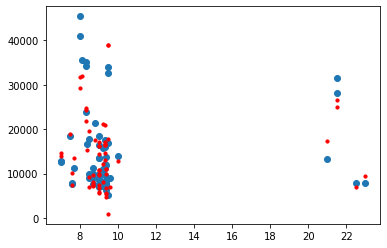

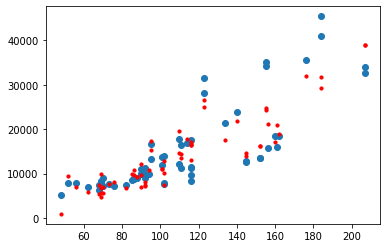

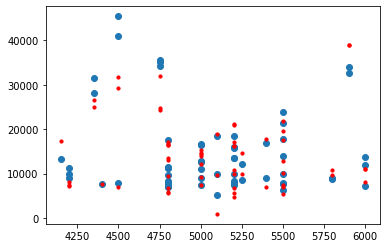

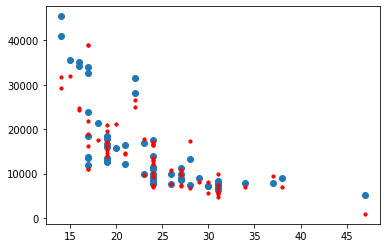

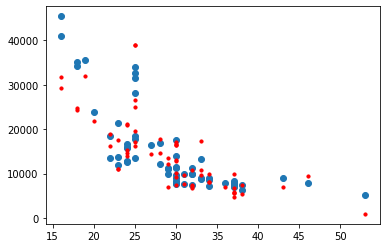

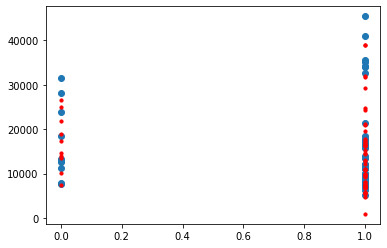

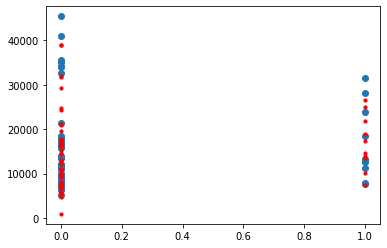

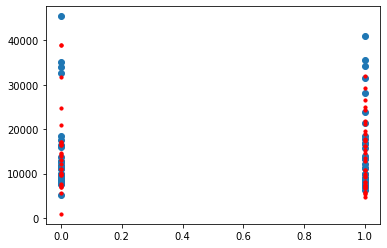

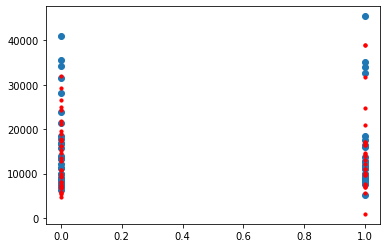

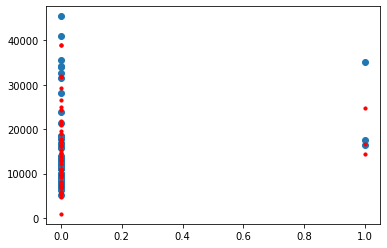

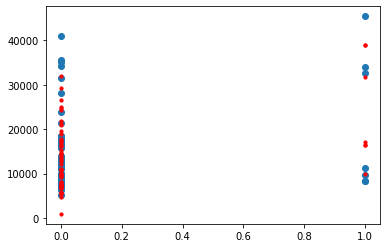

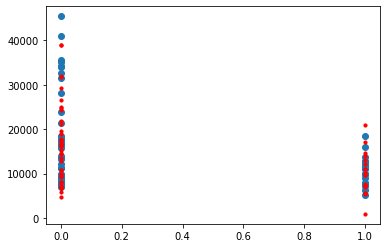

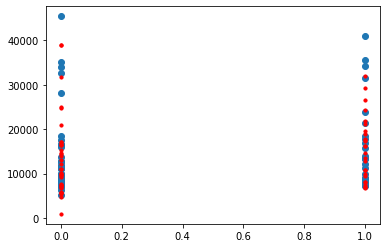

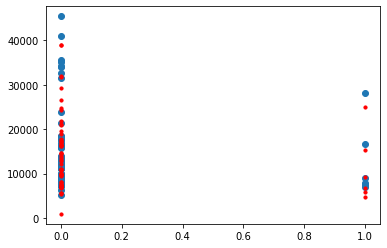

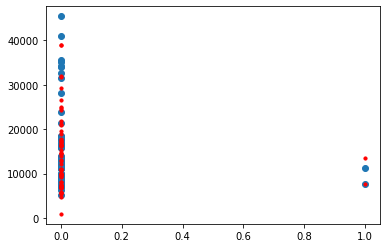

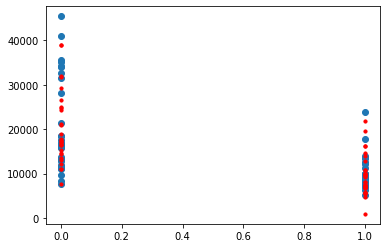

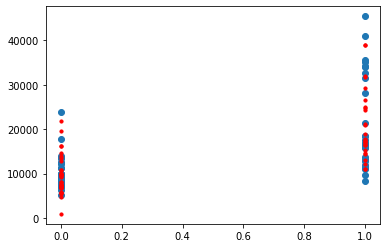

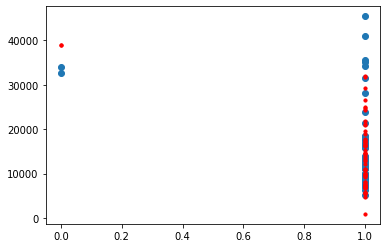

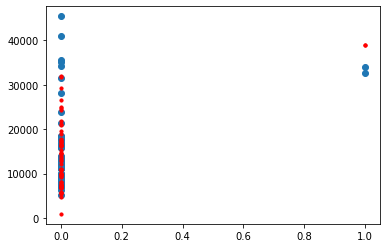

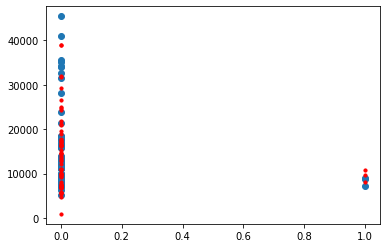

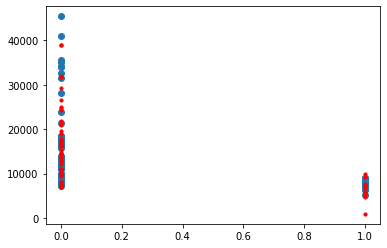

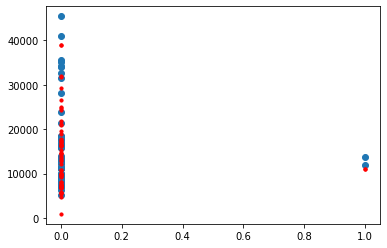

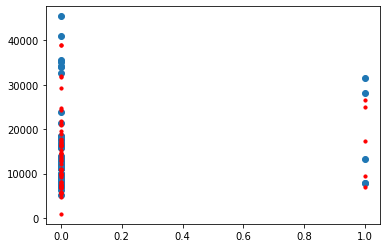

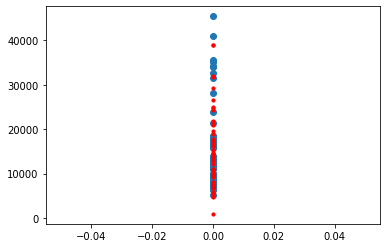

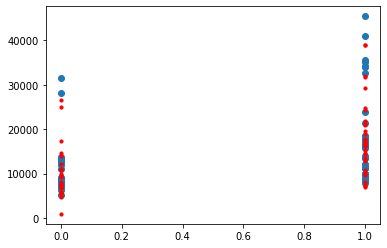

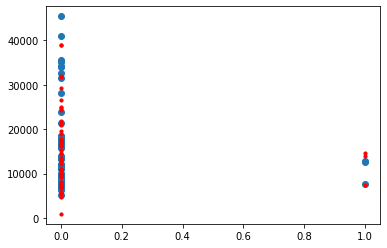

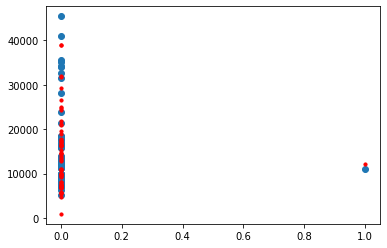

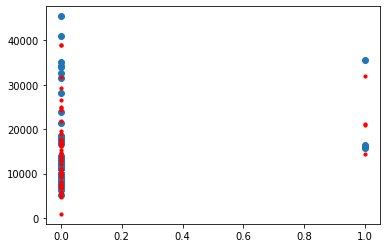

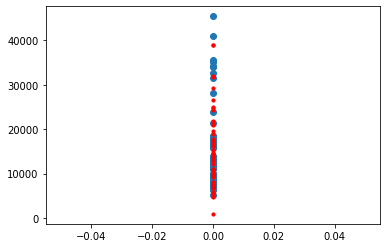

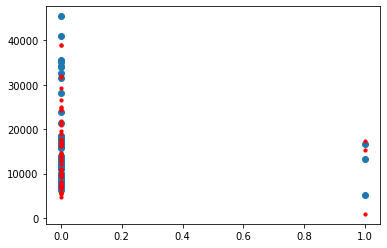

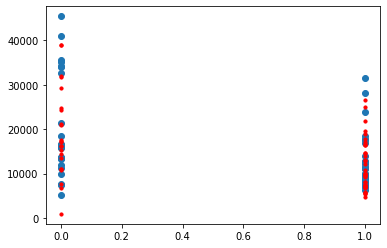

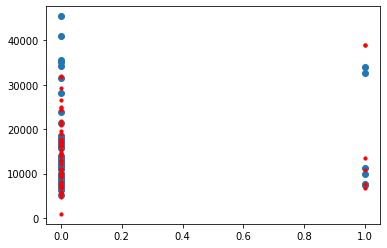

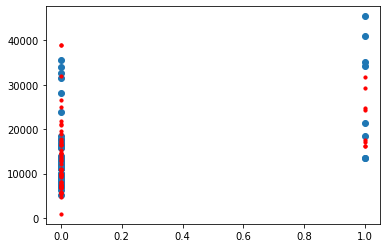

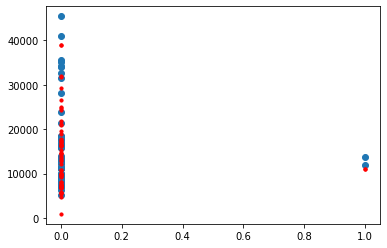

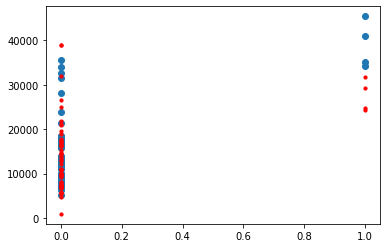

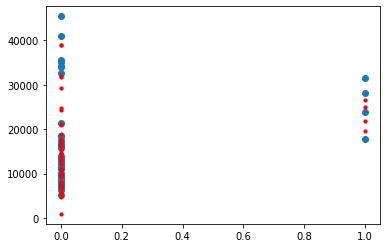

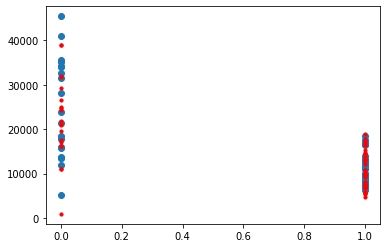

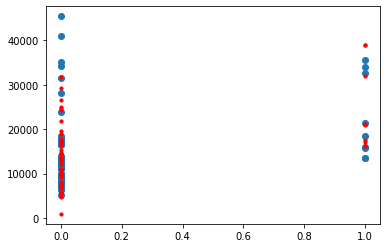

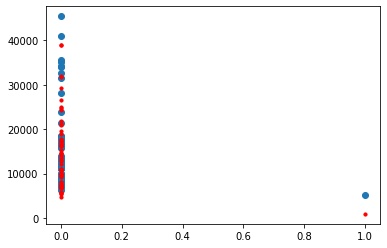

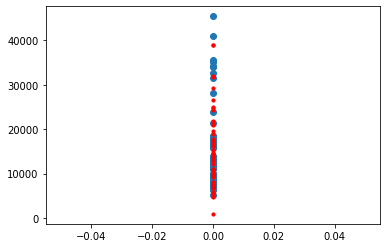

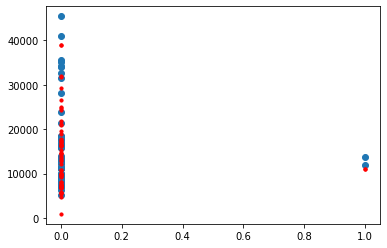

In [19]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [20]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2881.790030663878
Mean Squared Error: 16471238.622584397
R2 score: 0.815010893349911


In [1]:
model2 = LinearRegression()
x_train_0 = np.array(x_train['price']).reshape(-1,1)
model2.fit(x_train_0, y_train)
x_test_0 = np.array(x_test['price']).reshape(-1,1)
y_pred2 = model2.predict(x_test_0)
plt.scatter(x_test_0, y_test)
plt.plot(x_test_0, y_pred2, color='red', linewidth=2);
plt.show()



NameError: ignored

Средний квадрат и модуль ошибки слишком большие, значит обученная модель работает слишком плохо